In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline 
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

In [99]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [100]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [101]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [102]:
print(boston.data.shape)

(506, 13)


In [103]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [104]:
# Naming the df columns from boston dataset
bos.columns=boston.feature_names
# Target variable is to be included into the df for training
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [105]:
# Exploratory Analysis
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [106]:
# Splitting of Dependent and independent variables
Y=bos['PRICE']
X=bos.drop('PRICE', axis=1)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

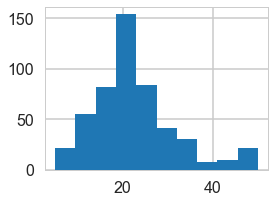

In [107]:
plt.figure(figsize=(4, 3))
plt.hist(Y)

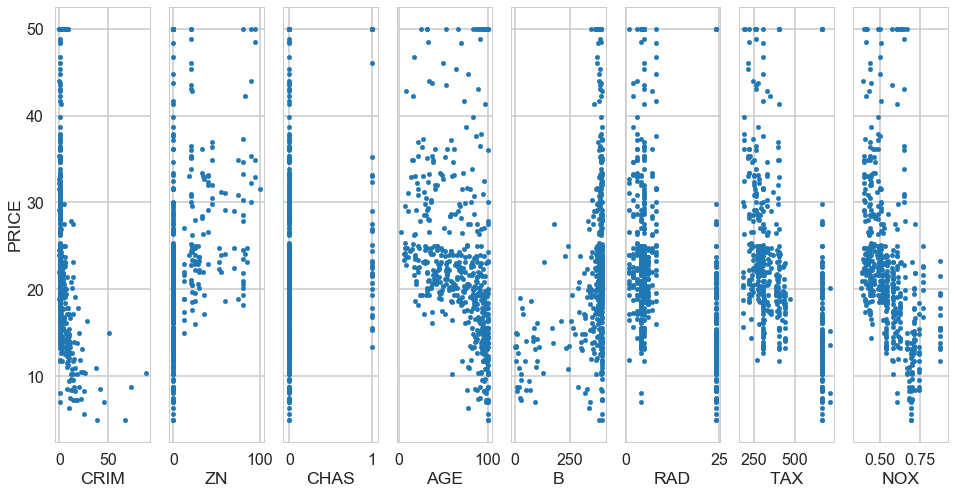

In [108]:
# Data Visualisation
fig , axs=plt.subplots(1,8,sharey=True)
bos.plot(kind='scatter', x='CRIM', y='PRICE',ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter',x='ZN', y='PRICE',ax=axs[1])
bos.plot(kind='scatter',x='CHAS', y='PRICE',ax=axs[2])
bos.plot(kind='scatter',x='AGE', y='PRICE',ax=axs[3])
bos.plot(kind='scatter',x='B', y='PRICE',ax=axs[4])
bos.plot(kind='scatter',x='RAD', y='PRICE',ax=axs[5])
bos.plot(kind='scatter',x='TAX', y='PRICE',ax=axs[6])
bos.plot(kind='scatter',x='NOX', y='PRICE',ax=axs[7])

In [109]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
# With entire dataset
lm = LinearRegression()
lm.fit(X, Y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

# sume of squares of errors 
np.sum(np.square(lm.predict(X)-Y))

36.49110328036022
[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


11080.276284149873

In [110]:
# Splitting of training and testing data
X_Train,X_Test,y_Train,y_Test = train_test_split(X,Y,test_size = 0.3,random_state=9)
lm = LinearRegression()
lm.fit(X_Train,y_Train)
np.sum(np.square(lm.predict(X_Train)-y_Train))

8204.384137081941

In [112]:
sklearn.metrics.mean_squared_error(y_Test, y_pred)

19.283258440533054

In [114]:
# Using LASSO to find critical features
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(X)
names = boston["feature_names"]
lasso = Lasso(alpha=.3)
lasso.fit(x_new, Y)
print(names,lasso.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] [-0.23616802  0.08100299 -0.          0.54017417 -0.70027816  2.99189989
 -0.         -1.08067403  0.         -0.         -1.75682067  0.63108483
 -3.70696598]


In [80]:
# CRIM+ZN+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT
import statsmodels.formula.api as smf
lm= smf.ols(formula='PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT+RAD+TAX+AGE+INDUS', data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 18 Aug 2018   Prob (F-statistic):          6.95e-135
Time:                        20:31:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# Dropping Age and Indus due to high P-value
lm_new = smf.ols(formula='PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT+RAD+TAX', data=bos).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 18 Aug 2018   Prob (F-statistic):          5.74e-137
Time:                        21:11:07   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3694      5.069      7.176      0.000      26.411      46.328
CRIM          -0.1076      0.033     -3.296      0.001      -0.172      -0.043
ZN             0.0458      0.014      3.387      0.001       0.019       0.072
CHAS           2.7212      0.854      3.185      0.002       1.043       4.400
NOX          -17.3956      3.536     -4.920      0.000     -24.343     -10.448
RM             3.7966      0.406      9.343      0.000       2.998       4.595
DIS           -1.4934      0.186     -8.039      0.000      -1.858      -1.128
PTRATIO       -0.9471      0.129     -7.337      0.000      -1.201      -0.693
B              0.0094      0.003      3.508      0.000       0.004       0.015
LSTAT         -0.5232      0.047    -11.037      0.000      -0.616      -0.430
RAD            0.2991      0.063      4.719      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.488      0.001      -0.018      -0.005
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

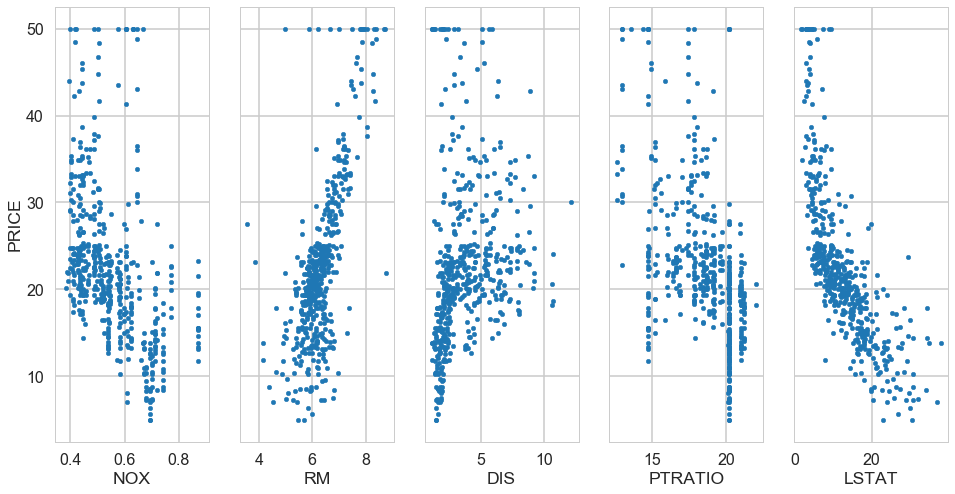

In [120]:
# Model is getting affected by below variables
fig , axs=plt.subplots(1,5,sharey=True)
bos.plot(kind='scatter', x='NOX', y='PRICE',ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter',x='RM', y='PRICE',ax=axs[1])
bos.plot(kind='scatter',x='DIS', y='PRICE',ax=axs[2])
bos.plot(kind='scatter',x='PTRATIO', y='PRICE',ax=axs[3])
bos.plot(kind='scatter',x='LSTAT', y='PRICE',ax=axs[4])

Text(0.5,1,'Actual Prices vs Predicted Prices')

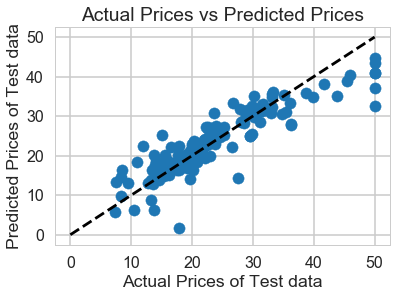

In [121]:
# Testing the model will shortlisted features.....
y_pred_test = lm_new.predict(X_Test)
plt.scatter(y_Test, y_pred_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel("Actual Prices of Test data")
plt.ylabel("Predicted Prices of Test data")
plt.title("Actual Prices vs Predicted Prices")